In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold
import warnings


…an opportunity to help the fictional company Keep It Dry improve its main product Super Soaker. The product is used in factories to absorb spills and leaks.
The company has just completed a large testing study for different product prototypes. Can you use this data to build a model that predicts product failures?
Each product is used in a simulated real-world environment experiment, and and absorbs a certain amount of fluid (loading) to see whether or not it fails.
Your task is to use the data to predict individual product failures of new codes with their individual lab test results.

In [85]:
train= pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv')
test= pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')

In [50]:
train.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [75]:
test.columns

Index(['id', 'product_code', 'loading', 'attribute_2', 'attribute_3',
       'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3',
       'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7',
       'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11',
       'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15',
       'measurement_16', 'measurement_17', '0_7', '1_6', '1_8'],
      dtype='object')

In [67]:
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [68]:
test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


Trying to make sense of the data:
-loading?
sponge is made up of 2 layers (attribute 0 & attribute 1)
-measurements mostly in same range except for measurement 17 (scaling needed)

In [63]:
train.attribute_0.unique()

array(['material_7', 'material_5'], dtype=object)

In [64]:
train.attribute_1.unique()

array(['material_8', 'material_5', 'material_6'], dtype=object)

In [26]:
float_cols= test.select_dtypes(include=['float','int']).columns

In [4]:
cat_cols= train.select_dtypes(include=['object']).columns
cat_cols

Index(['product_code', 'attribute_0', 'attribute_1'], dtype='object')

**Feature Engineering**

In [61]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
m_3_missing          0
m_5_missing          0
dtype: int64

Lots of missing values. There are may ways we could tackle this. https://www.kaggle.com/code/azminetoushikwasi/ml-foundation-imputation-all-techniques

In [3]:
null_cols = train.columns[train.isnull().any()]

In [4]:
null_cols

Index(['loading', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

In [5]:
null= train[null_cols].select_dtypes(include=['float','int'])
null

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,80.10,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,84.89,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,82.43,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,101.07,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,188.06,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,16.301,13.259,18.068,15.505,10.865,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131
26566,146.02,17.543,NaN,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924
26567,115.62,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364
26568,106.38,18.059,NaN,16.918,18.101,11.713,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156


In [ ]:
plt.subplots(figsize=(25,35))
for i, column in enumerate(null.columns):
    plt.subplot(6,4,i+1)
    sns.histplot(data=null, x=column)
    plt.title(column)

All of the variables with missing values appear to be normally distributed. In this case, the simplest way would be to replace the missing values with the mean. 
I will cross-validate using GroupKFold. This is becasue the train and test set have different product codes. E.g for train we have A,B,C,D & E whilst for test we have F,G,H & I. So during training, the classifier will not see any of the product codes. I want to recreate this situation in the cross-validation to prevent any inflated cross-val scores. This way, during cross-val, the model will be trained on the products with all the product codes except for the ones with the product code found in the validation set.  
Idea taken from this discussion: https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/discussion/341070

In [20]:
kf = GroupKFold(n_splits=5) 
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train.failure, train.product_code)):
    print(fold,(idx_tr, idx_va))

0 (array([    0,     1,     2, ..., 26567, 26568, 26569]), array([10350, 10351, 10352, ..., 16112, 16113, 16114]))
1 (array([    0,     1,     2, ..., 21224, 21225, 21226]), array([21227, 21228, 21229, ..., 26567, 26568, 26569]))
2 (array([    0,     1,     2, ..., 26567, 26568, 26569]), array([ 5100,  5101,  5102, ..., 10347, 10348, 10349]))
3 (array([    0,     1,     2, ..., 26567, 26568, 26569]), array([16115, 16116, 16117, ..., 21224, 21225, 21226]))
4 (array([ 5100,  5101,  5102, ..., 26567, 26568, 26569]), array([   0,    1,    2, ..., 5097, 5098, 5099]))


In [52]:
val_scores=[]
fi=[]

In [8]:
train= train.drop('id',axis=1)
test= test.drop('id',axis=1)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import roc_auc_score

In [13]:
kf = GroupKFold(n_splits=5) 
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train.failure, train.product_code)):
    X_train = train.iloc[idx_tr][test.columns]
    X_valid = train.iloc[idx_va][test.columns]
    y_train = train.iloc[idx_tr].failure
    y_valid = train.iloc[idx_va].failure

    ohe_attributes = ['attribute_0', 'attribute_1']
    ohe_output = ['0_7', '1_6', '1_8']
    ohe = OneHotEncoder(categories=[['material_7', 'material_5'], #only these are found in attribute 0 column
                                    ['material_5', 'material_6', 'material_8']],
                        drop='first', sparse=False, handle_unknown='ignore')
    ohe.fit(X_train[ohe_attributes])
    for df in [X_train, X_valid]:
        with warnings.catch_warnings(): # ignore "Found unknown categories"
            warnings.filterwarnings('ignore', category=UserWarning)
            df[ohe_output] = ohe.transform(df[ohe_attributes])
        df.drop(columns=ohe_attributes, inplace=True)
    
    features= [f for f in X_train.columns if f.startswith('measurement') or f=='loading']
    imputer= KNNImputer()
    imputer= imputer.fit(train[features])
    for df in [X_train, X_valid]:
        df[features]= imputer.transform(df[features])
        
    features2 = [f for f in X_train.columns if f != 'product_code']
    
    clf = RandomForestClassifier()
    clf.fit(X_train[features2], y_train)
    y_va_pred = clf.predict_proba(X_valid[features2])[:,1]
    score = roc_auc_score(y_valid, y_va_pred) 
    print(f"Fold {fold}: auc = {score:.5f}")
    val_scores.append(score)
    fi.append(clf.feature_importances_)

print(f"Average auc = {sum(val_scores) / len(val_scores)}")

Fold 0: auc = 0.55151
Fold 1: auc = 0.53612
Fold 2: auc = 0.54816
Fold 3: auc = 0.55385
Fold 4: auc = 0.56366


TypeError: 'numpy.float64' object is not iterable

In [49]:
print(f"Average auc = {sum(val_scores) / len(val_scores)}")

Average auc = 0.550659132607031


0.55 is not great, the model is essentially guessing. 

In [46]:
importance_df = pd.DataFrame(np.array(fi).T, index=test.columns)
importance_df['mean'] = importance_df.mean(axis=1).abs()
importance_df = importance_df.sort_values('mean', ascending=False)

In [47]:
importance_df.head()

,0,1,2,3,4,mean
product_code,0.071854,0.071811,0.071485,0.071200,0.069547,0.071179
measurement_2,0.054431,0.053791,0.054200,0.053760,0.054202,0.054077
measurement_1,0.053888,0.053701,0.052930,0.053465,0.054313,0.053659
measurement_11,0.053650,0.053117,0.054198,0.053455,0.053650,0.053614
measurement_0,0.052736,0.053662,0.053578,0.053049,0.053653,0.053336


<AxesSubplot:title={'center':'Feature Importance Across Folds'}>

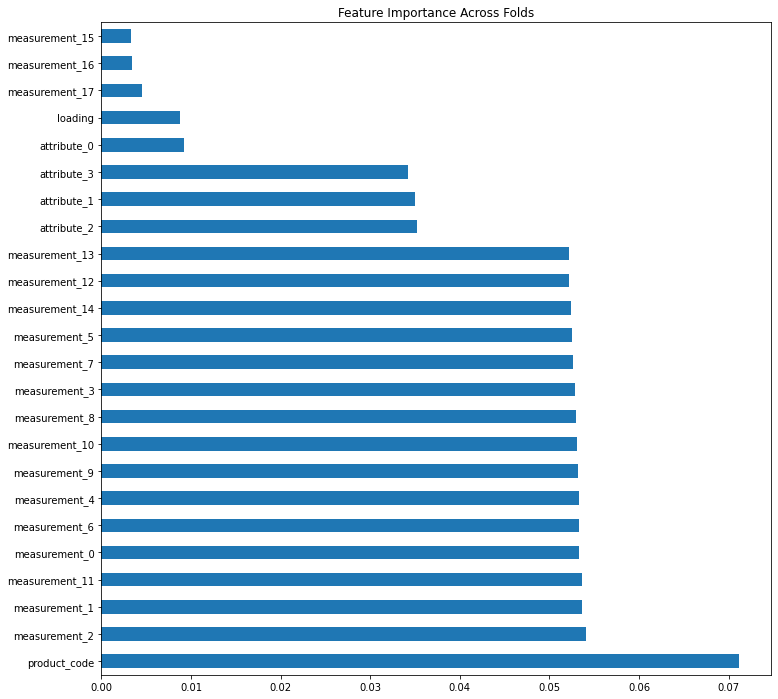

In [48]:
importance_df['mean'].plot(
        kind="barh", figsize=(12, 12), title="Feature Importance Across Folds"
    )

In [51]:
from sklearn.linear_model import LogisticRegression

In [54]:
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train.failure, train.product_code)):
    X_train = train.iloc[idx_tr][test.columns]
    X_valid = train.iloc[idx_va][test.columns]
    y_train = train.iloc[idx_tr].failure
    y_valid = train.iloc[idx_va].failure
    
    ohe_attributes = ['attribute_0', 'attribute_1']
    ohe_output = ['0_7', '1_6', '1_8']
    ohe = OneHotEncoder(categories=[['material_7', 'material_5'], #only these are found in attribute 0 column
                                    ['material_5', 'material_6', 'material_8']],
                        drop='first', sparse=False, handle_unknown='ignore')
    ohe.fit(X_train[ohe_attributes])
    for df in [X_train, X_valid]:
        with warnings.catch_warnings(): # ignore "Found unknown categories"
            warnings.filterwarnings('ignore', category=UserWarning)
            df[ohe_output] = ohe.transform(df[ohe_attributes])
        df.drop(columns=ohe_attributes, inplace=True)
    

    imputer= KNNImputer()
    imputer= imputer.fit(train[features])
    for df in [X_train, X_valid]:
        df[features]= imputer.transform(df[features])
        
    
    
    clf = LogisticRegression()
    clf.fit(X_train[features2], y_train)
    y_va_pred = clf.predict_proba(X_valid[features2])[:,1]
    score = roc_auc_score(y_valid, y_va_pred) 
    print(f"Fold {fold}: auc = {score:.5f}")

print(f"Average auc = {sum(val_scores) / len(val_scores)}")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold 0: auc = 0.58093


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold 1: auc = 0.58169
Fold 2: auc = 0.58816


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Fold 3: auc = 0.59037
Fold 4: auc = 0.59070


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


ZeroDivisionError: division by zero

Logistic Regression appears to be a better model. 

I will try to feature enginner some new features, and then perform some feature selection techniques to try to improve the score. The following cell was inspired by:https://www.kaggle.com/competitions/tabular-playground-series-aug-2022/discussion/342319. Here, a new feature is created based on whether the column has mising values. The intuition behind this is there might be a certain reason why they were not able to record a value for that product, which may be linked to whether the product fails. 

In [86]:
train['m_3_missing'] = train.measurement_3.isna()
train['m_5_missing'] = train.measurement_5.isna()
train['loading_missing']= train.loading.isna()

test['m_3_missing'] = test.measurement_3.isna()
test['m_5_missing'] = test.measurement_5.isna()
test['loading_missing']= test.loading.isna()

Idea: For each product, how many na it has?  

In [63]:
train.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
26565    2
26566    1
26567    0
26568    1
26569    0
Length: 26570, dtype: int64

In [87]:
train['number of na']=train.isnull().sum(axis=1)
test['number of na']=test.isnull().sum(axis=1)

In [88]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [57]:
!pip install feature_engine
from feature_engine.encoding import WoEEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 3.2 MB/s eta 0:00:00a 0:00:01


**WOE Encoder**
The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable
WOE = ln(% of non-events / % of events)
E.g for a categorical variable:


In [89]:
woe_encoder = WoEEncoder(variables=[ 'attribute_0', 'attribute_1'])
woe_encoder.fit(train[test.columns], train.failure)
train[test.columns] = woe_encoder.transform(train[test.columns])
test = woe_encoder.transform(test)

/opt/conda/lib/python3.7/site-packages/feature_engine/encoding/base_encoder.py:239: UserWarning: During the encoding, NaN values were introduced in the feature(s) attribute_1.
  "During the encoding, NaN values were introduced in the feature(s) "


In [91]:
train[['m_3_missing','m_5_missing','loading_missing']] = train[['m_3_missing','m_5_missing','loading_missing']].astype(int)

In [78]:
train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,m_3_missing,m_5_missing,number of na,loading_missing
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,15.029,NaN,13.034,14.684,764.100,0,False,False,1,False
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,14.732,15.425,14.395,15.631,682.057,0,False,False,0,False
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,16.711,18.631,14.094,17.946,663.376,0,False,False,1,False
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,15.250,15.562,16.154,17.172,826.282,0,False,False,0,False
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,16.182,12.760,13.153,16.412,579.885,0,False,False,0,False


In [92]:
X.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,m_3_missing,m_5_missing,loading_missing,number of na
0,A,80.10,0.017894,0.037537,9,5,7,8,4,18.040,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,0,1
1,A,84.89,0.017894,0.037537,9,5,14,3,3,18.213,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,0,0
2,A,82.43,0.017894,0.037537,9,5,12,1,5,18.057,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,0,1
3,A,101.07,0.017894,0.037537,9,5,13,2,6,17.295,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,0,0
4,A,188.06,0.017894,0.037537,9,5,9,2,8,19.346,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,0,0


In [93]:
val_scores=[]

In [95]:
importance_list=[]
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train.failure, train.product_code)):
    X_train = train.iloc[idx_tr][test.columns]
    X_valid = train.iloc[idx_va][test.columns]
    y_train = train.iloc[idx_tr].failure
    y_valid = train.iloc[idx_va].failure
    
    imputer= KNNImputer()
    imputer= imputer.fit(train[features])
    for df in [X_train, X_valid]:
        df[features]= imputer.transform(df[features])
        
    clf = LogisticRegression()
    clf.fit(X_train[features2], y_train)
    y_va_pred = clf.predict_proba(X_valid[features2])[:,1]
    score = roc_auc_score(y_valid, y_va_pred)
    val_scores.append(score)
    importance_list.append(clf.coef_.ravel())
    print(f"Fold {fold}: auc = {score:.5f}")
    

print(f"Average auc = {sum(val_scores) / len(val_scores)}")

AttributeError: 'DataFrame' object has no attribute 'failure'

In [ ]:
importance_df = pd.DataFrame(np.array(importance_list).T, index=x_train[select_feature].columns)
importance_df['mean'] = importance_df.mean(axis=1).abs()
importance_df['feature'] = x_train[select_feature].columns
importance_df = importance_df.sort_values('mean', ascending=False).reset_index().head(20)
plt.barh(importance_df.index, importance_df['mean'], color='lightgreen')
plt.gca().invert_yaxis()
plt.yticks(ticks=importance_df.index, labels=importance_df['feature'])
plt.title('LogisticRegression feature importances')